<a href="https://colab.research.google.com/github/lucas-magalhaes-c/TCC_FloodFeel/blob/main/src/flood_image_classification/Classificador_de_enchente_e_n%C3%A3o_enchente_treinamento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Etapa 1 
### Adquirir, tratar e armazenar os dados!

In [ ]:
# Montar o drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import zipfile
 
# Extrair as imagens
local_zip = '/content/drive/My Drive/Escola Politécnica/2020/TCC/TCC - Enchentes/TCC - II/flood-and-not-flood-test.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [ ]:
# Pegar os caminhos dos diretórios
base_dir = '/tmp/flood-and-not-flood-test'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
 
# Directory with our training flood pictures
train_flood_dir = os.path.join(train_dir, 'flood')
 
# Directory with our training not flood pictures
train_not_flood_dir = os.path.join(train_dir, 'not-flood')
 
# Directory with our validation flood pictures
validation_flood_dir = os.path.join(validation_dir, 'flood')
 
# Directory with our validation not flood pictures
validation_not_flood_dir = os.path.join(validation_dir, 'not-flood')

In [ ]:
# Visualizar as imagens
 
train_flood_fnames = os.listdir(train_flood_dir)
print(train_flood_fnames[:10])
 
train_not_flood_fnames = os.listdir(train_not_flood_dir)
train_not_flood_fnames.sort()
print(train_not_flood_fnames[:10])
 
print('total training flood images:', len(os.listdir(train_flood_dir)))
print('total training not flood images:', len(os.listdir(train_not_flood_dir)))
print('total validation flood images:', len(os.listdir(validation_flood_dir)))
print('total validation not flood images:', len(os.listdir(validation_not_flood_dir)))

['flood.0117.jpg', 'flood.0024.jpg', 'flood.0371.jpg', 'flood.0050.jpg', 'flood.0072.jpg', 'flood.0056.jpg', 'flood.0291.jpg', 'flood.0443.jpg', 'flood.0019.jpg', 'flood.0161.jpg']
['not-flood.0000.jpg', 'not-flood.0001.jpg', 'not-flood.0002.jpg', 'not-flood.0003.jpg', 'not-flood.0004.jpg', 'not-flood.0005.jpg', 'not-flood.0006.jpg', 'not-flood.0007.jpg', 'not-flood.0008.jpg', 'not-flood.0009.jpg']
total training flood images: 587
total training not flood images: 142
total validation flood images: 326
total validation not flood images: 72


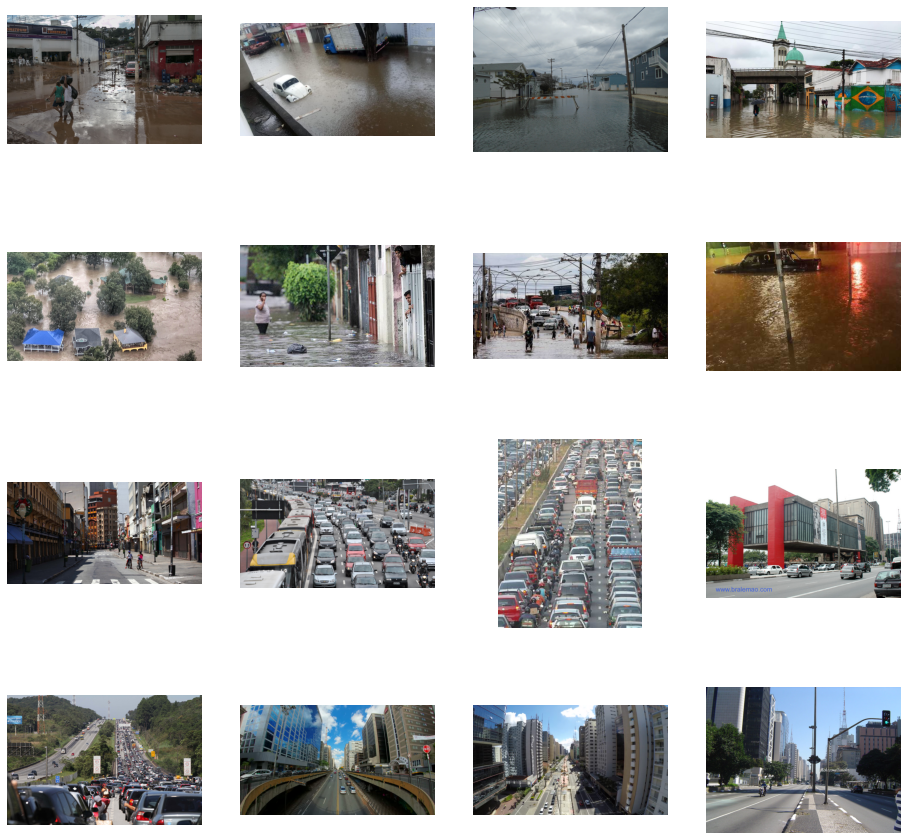

In [ ]:
%matplotlib inline
 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
 
# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4
 
# Index for iterating over images
pic_index = 0
 
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)
 
pic_index += 8
next_flood_pix = [os.path.join(train_flood_dir, fname) 
                for fname in train_flood_fnames[pic_index-8:pic_index]]
next_not_flood_pix = [os.path.join(train_not_flood_dir, fname) 
                for fname in train_not_flood_fnames[pic_index-8:pic_index]]
 
for i, img_path in enumerate(next_flood_pix+next_not_flood_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)
 
  img = mpimg.imread(img_path)
  plt.imshow(img)
 
plt.show()



In [ ]:
## Etapa 2
### Montar a rede neural


In [ ]:
from tensorflow.keras import layers
from tensorflow.keras import Model
 
# Our input feature map is 730x1100x3: 730x1100 for the image pixels, and 3 for
# the three color channels: R, G, and B
img_input = layers.Input(shape=(730, 1100, 3))
 
# First convolution extracts 16 filters that are 3x3
# Convolution is followed by max-pooling layer with a 2x2 window
x = layers.Conv2D(16, 3, activation='relu')(img_input)
x = layers.MaxPooling2D(2)(x)
 
# Second convolution extracts 32 filters that are 3x3
# Convolution is followed by max-pooling layer with a 2x2 window
x = layers.Conv2D(32, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)
x = layers.Dropout(0.5)(x)

# Third convolution extracts 64 filters that are 3x3
# Convolution is followed by max-pooling layer with a 2x2 window
x = layers.Conv2D(64, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)
x = layers.Dropout(0.5)(x)

# Third convolution extracts 64 filters that are 3x3
# Convolution is followed by max-pooling layer with a 2x2 window
x = layers.Conv2D(128, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)
x = layers.Dropout(0.5)(x)

# Flatten feature map to a 1-dim tensor so we can add fully connected layers
x = layers.Flatten()(x)
 
# Create a fully connected layer with ReLU activation and 512 hidden units
x = layers.Dense(512, activation='relu')(x)

# Create output layer with a single node and sigmoid activation
output = layers.Dense(1, activation='sigmoid')(x)
 
# Create model:
# input = input feature map
# output = input feature map + stacked convolution/maxpooling layers + fully 
# connected layer + sigmoid output layer
model = Model(img_input, output)
 
model.summary()


Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 730, 1100, 3)]    0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 728, 1098, 16)     448       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 364, 549, 16)      0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 362, 547, 32)      4640      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 181, 273, 32)      0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 181, 273, 32)      0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 179, 271, 64)     

In [ ]:
from tensorflow.keras.optimizers import RMSprop
 
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['acc'])

In [ ]:
## Etapa 3
### Treinar a rede neural


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Adding rescale, rotation_range, width_shift_range, height_shift_range,
# shear_range, zoom_range, and horizontal flip to our ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

# Note that the validation data should not be augmented!
val_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 32 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(730, 1100),  # All images will be resized to 730x1100
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow validation images in batches of 20 using val_datagen generator
validation_generator = val_datagen.flow_from_directory(
        validation_dir,
        target_size=(730, 1100),
        batch_size=20,
        class_mode='binary')

Found 729 images belonging to 2 classes.
Found 398 images belonging to 2 classes.


In [ ]:
# Realizar o treinamento
history = model.fit_generator(
      train_generator,
      steps_per_epoch=36,  # 729 images = batch_size * steps
      epochs=15,
      validation_data=validation_generator,
      validation_steps=19,  # 398 images = batch_size * steps
      verbose=2)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/15
36/36 - 154s - loss: 2.1018 - acc: 0.7884 - val_loss: 0.5912 - val_acc: 0.8158
Epoch 2/15
36/36 - 149s - loss: 0.4941 - acc: 0.8025 - val_loss: 0.4192 - val_acc: 0.8158
Epoch 3/15
36/36 - 145s - loss: 0.4532 - acc: 0.8054 - val_loss: 0.4365 - val_acc: 0.8684
Epoch 4/15
36/36 - 149s - loss: 0.4206 - acc: 0.8138 - val_loss: 0.3251 - val_acc: 0.8447
Epoch 5/15
36/36 - 149s - loss: 0.4106 - acc: 0.8011 - val_loss: 0.3317 - val_acc: 0.8474
Epoch 6/15
36/36 - 148s - loss: 0.3843 - acc: 0.8039 - val_loss: 0.3573 - val_acc: 0.8684
Epoch 7/15
36/36 - 158s - loss: 0.3823 - acc: 0.8293 - val_loss: 0.2978 - val_acc: 0.8789
Epoch 8/15
36/36 - 154s - loss: 0.3992 - acc: 0.8392 - val_loss: 0.3125 - val_acc: 0.8763
Epoch 9/15
36/36 - 153s - loss: 0.3614 - acc: 0.8181 - val_loss: 0.3027 - val_acc: 0.8789
Epoch 10/15
36/36 - 145s - loss: 0.3624 - acc: 0.8463 - val_loss: 0.2881 - val_acc: 0.8842
Epoch 11/15
36/36 - 140

In [ ]:
## Etapa 4
### Avaliar e salvar a rede neural

In [ ]:
# list all data in history
print(history.history.keys())

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


Text(0.5, 1.0, 'Training and validation loss')

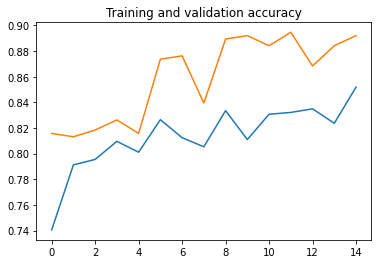

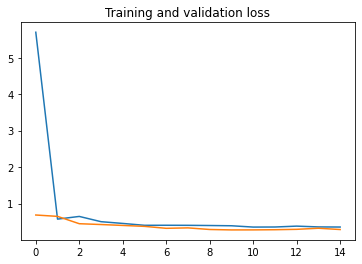

In [ ]:
# Retrieve a list of accuracy results on training and validation data
# sets for each training epoch
acc = history.history['acc']
val_acc = history.history['val_acc']
 
# Retrieve a list of list results on training and validation data
# sets for each training epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
 
# Get number of epochs
epochs = range(len(acc))
 
# Plot training and validation accuracy per epoch
plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.title('Training and validation accuracy')
 
plt.figure()
 
# Plot training and validation loss per epoch
plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title('Training and validation loss')


In [ ]:
# Salvar o modelo treinado
caminho = '/content/drive/My Drive/Escola Politécnica/2020/TCC/TCC - Enchentes/TCC - II/'
model.save(caminho+"model_flood_not_flood.h5")
print("Saved model to disk")

Saved model to disk
